In [54]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PIL
import os, random

from glob import glob
from mpl_toolkits.axes_grid1 import ImageGrid
from IPython.display import display, Image
from IPython.core.display import HTML

%matplotlib inline

---
## Import Data

In [55]:
# Creating paths to training / test data.
train_path = os.path.join('dogImages', 'train')
valid_path = os.path.join('dogImages', 'valid')
test_path = os.path.join('dogImages', 'test')

# Creating paths to pre-processed training / validation / test data.
processed_train_path = os.path.join('dogImages', 'processed_train')
processed_valid_path = os.path.join('dogImages', 'processed_valid')
processed_test_path = os.path.join('dogImages', 'processed_test')

# Make sure these directories exist.
for directory in [ processed_train_path, processed_valid_path, processed_test_path ]:
    if not os.path.isdir(directory):
        os.makedirs(directory)

In [44]:
def subdir_to_paths(directory):
    '''Creates a list of paths for all files across multiple subdirectories.'''
    
    subdirs = sorted(glob('/'.join([directory, '*'])))
    paths = []

    for s in subdirs:
        for filename in os.listdir(s):
            paths.append('/'.join([s, filename]))

    return paths

In [56]:
train_img_paths = subdir_to_paths(train_path)
valid_img_paths = subdir_to_paths(valid_path)
test_img_paths = subdir_to_paths(test_path)

print(train_img_paths[0:5])
print(valid_img_paths[0:5])
print(test_img_paths[0:5])

['dogImages/train/001.Affenpinscher/Affenpinscher_00053.jpg', 'dogImages/train/001.Affenpinscher/Affenpinscher_00033.jpg', 'dogImages/train/001.Affenpinscher/Affenpinscher_00034.jpg', 'dogImages/train/001.Affenpinscher/Affenpinscher_00039.jpg', 'dogImages/train/001.Affenpinscher/Affenpinscher_00026.jpg']
['dogImages/valid/001.Affenpinscher/Affenpinscher_00038.jpg', 'dogImages/valid/001.Affenpinscher/Affenpinscher_00074.jpg', 'dogImages/valid/001.Affenpinscher/Affenpinscher_00041.jpg', 'dogImages/valid/001.Affenpinscher/Affenpinscher_00068.jpg', 'dogImages/valid/001.Affenpinscher/Affenpinscher_00042.jpg']
['dogImages/test/001.Affenpinscher/Affenpinscher_00003.jpg', 'dogImages/test/001.Affenpinscher/Affenpinscher_00071.jpg', 'dogImages/test/001.Affenpinscher/Affenpinscher_00058.jpg', 'dogImages/test/001.Affenpinscher/Affenpinscher_00048.jpg', 'dogImages/test/001.Affenpinscher/Affenpinscher_00047.jpg']


### View Image Samples

In [48]:
# function for displaying sample images

def view_img_samples(img_paths, n_samples):
    '''Displays a random sample of images from a list of image paths.'''
    
    # select random indexes from image path list
    n_images = len(img_paths)
    sample_idxs = np.random.choice(n_images, n_samples, replace=False)

    # display sample images
    fig = plt.figure(figsize=(15,10)) 
    for i in enumerate(sample_idxs):
        # Choose a random file from the training data directory.
        img_path = img_paths[i[1]]
        # Display the image contained in the chosen file.
        img = mpimg.imread(img_path)
        ax = fig.add_subplot(2,3,i[0]+1)
        ax.imshow(img.squeeze(), cmap="gray", interpolation='nearest')
        plt.title(img_path.split('/')[2])
        plt.axis('off')
    plt.show()    

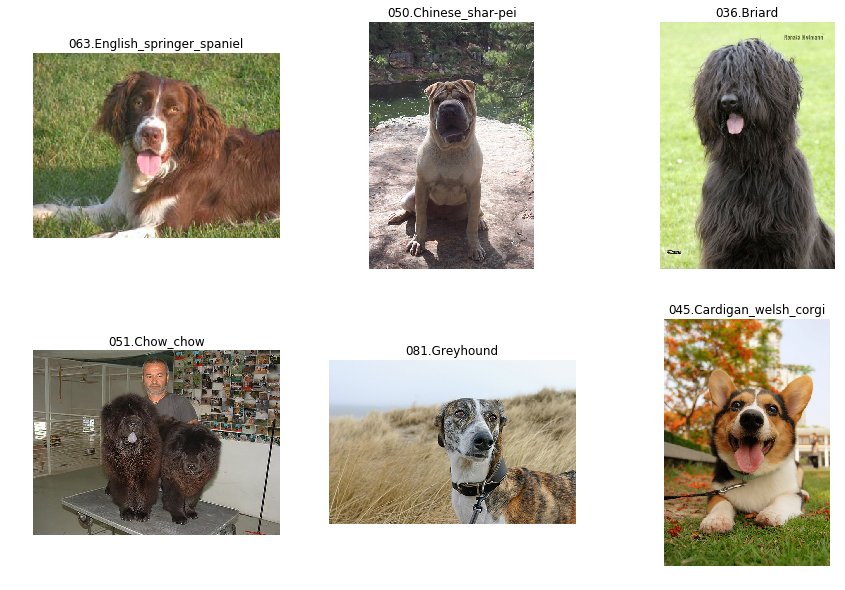

In [51]:
view_img_samples(train_img_paths, 6)

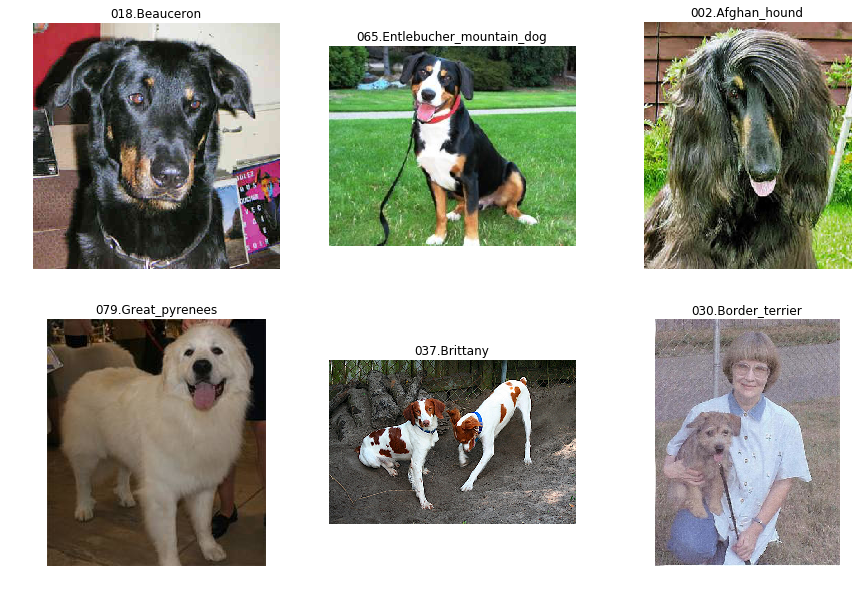

In [57]:
view_img_samples(valid_img_paths, 6)

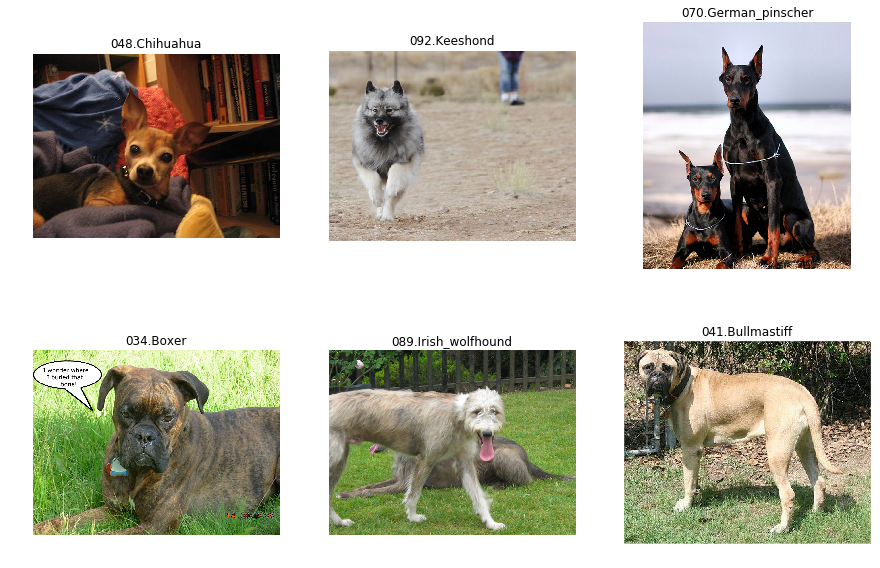

In [52]:
view_img_samples(test_img_paths, 6)

### Training Data Exploration

In [64]:
# Number of training and test images

n_train = len(train_img_paths)
n_valid = len(valid_img_paths)
n_test = len(test_img_paths)
n_total = n_train + n_valid + n_test

print("No. of training images: {} ({:.0f}%)".format(n_train, (n_train/n_total*100)))
print("No. of validation images: {} ({:.0f}%)".format(n_valid, (n_valid/n_total*100)))
print("No. of testing images: {} ({:.0f}%)".format(n_test, (n_test/n_total*100)))

No. of training images: 6680 (80%)
No. of validation images: 835 (10%)
No. of testing images: 836 (10%)


In [70]:
# Image sizes

widths, heights = [], []
width_min, width_max = np.inf, -np.inf
height_min, height_max = np.inf, -np.inf

for path in train_img_paths:
    image = PIL.Image.open(path)
    
    # Append image dimensions to list.
    widths.append(image.size[0])  # width
    heights.append(image.size[1])  # height

In [72]:
print('(avg width, avg height): ({:.0f}, {:.0f})'.format(np.mean(widths), np.mean(heights)))
print('(min width, max width): ', (np.min(widths), np.max(widths)))
print('(min height, max height): ', (np.min(heights), np.max(heights)))
print('(STD of widths, STD of heights): ({:.0f}, {:.0f})'.format(np.std(widths), np.std(heights)))

(avg width, avg height): (571, 532)
(min width, max width):  (112, 4278)
(min height, max height):  (113, 4003)
(STD of widths, STD of heights): (397, 342)


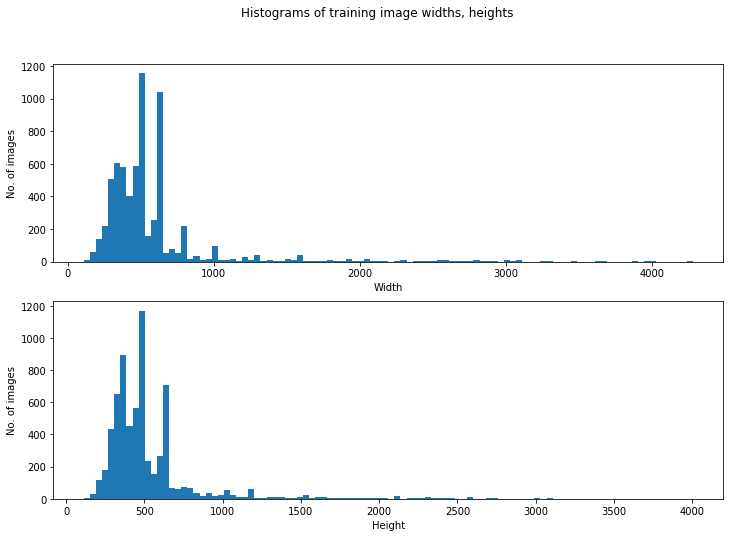

In [73]:
# Plot histograms of heights and widths.# Plot  
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 8))
fig.suptitle('Histograms of training image widths, heights')

ax1.hist(widths, bins=100); ax1.set_xlabel('Width'); ax1.set_ylabel('No. of images')
ax2.hist(heights, bins=100); ax2.set_xlabel('Height'); ax2.set_ylabel('No. of images')

plt.show()

In [ ]:

# Load up the training data labels using pandas (for .csv files, it's quite fast).# Load  
train_labels_path = os.path.join('..', 'data', 'labels.csv')
train_labels = pd.read_csv(train_labels_path)

# Show the first 10 lines of the DataFrame containing fields "id" and "breed".
train_labels.head(10)